<a href="https://colab.research.google.com/github/Davinchi211/Compiladores/blob/master/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#Detección de Fraude
---

In [1]:
!pip install --upgrade scikit-learn xgboost

In [2]:
import sklearn
import xgboost
print("scikit-learn version:", sklearn.__version__)
print("xgboost version:", xgboost.__version__)

scikit-learn version: 1.5.0
xgboost version: 2.0.3


In [3]:
import numpy as np
import pandas as pd
import seaborn as srn
import statistics  as sts
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [4]:
data = pd.read_csv('/content/Final Transactions.csv')
data.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [5]:
data.columns

Index(['Unnamed: 0', 'TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID',
       'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS',
       'TX_FRAUD', 'TX_FRAUD_SCENARIO'],
      dtype='object')

In [6]:
#6000 filas del dataset original
n = len(data)
m = np.random.randint(1,n,6000)
sample = data.iloc[m,]

In [7]:
sample = sample.iloc[:,1:]
sample.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
551900,551900,2023-02-27 11:53:10,2816,8734,69.98,4967590,57,0,0
956432,956432,2023-04-10 14:52:52,164,5601,371.75,8607172,99,0,0
108765,108765,2023-01-12 09:56:23,1682,7848,652.20,986183,11,0,0
612227,612227,2023-03-05 17:00:38,4369,138,98.86,5504438,63,0,0
1477430,1477430,2023-06-04 06:56:51,134,1182,703.11,13330611,154,0,0


In [8]:
sample.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO'],
      dtype='object')

In [9]:
sample = sample.drop(columns = ['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID'])
sample.head()

,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
551900,69.98,4967590,57,0,0
956432,371.75,8607172,99,0,0
108765,652.20,986183,11,0,0
612227,98.86,5504438,63,0,0
1477430,703.11,13330611,154,0,0


###Regresion Logística

In [10]:
#30% para pruebas 70% para entrenamiento
y = sample.TX_FRAUD
x = sample.drop(columns = ['TX_FRAUD', 'TX_FRAUD_SCENARIO'])

x_train, x_test, y_train, y_test = train_test_split(x ,y,test_size = 0.3,random_state = 0)

In [11]:
model_log = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=400 )
model_log.fit(x_train, y_train)

y_pred = model_log.predict(x_test)
mean_absolute_error(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:',int(acc*100),'%')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Imprimir las métricas
print("Precisión:", precision)
print("Exhaustividad:", recall)
print("Puntuación F1:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy Score: 96 %
Precisión: 0.8771186440677966
Exhaustividad: 0.8771186440677966
Puntuación F1: 0.8771186440677966


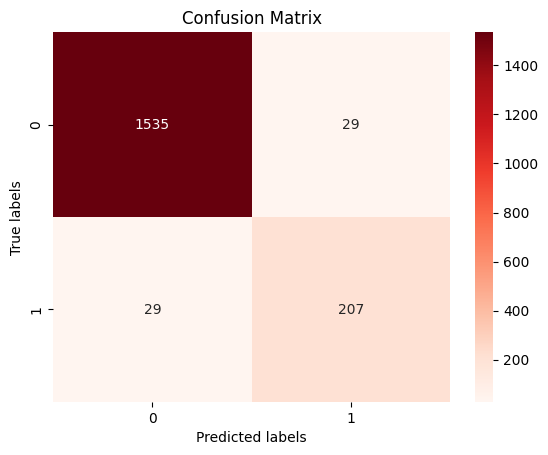

In [12]:
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', cmap = 'Reds', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

###Random Forest

In [13]:
model_rf = RandomForestClassifier(n_estimators = 400)
model_rf.fit(x_train , y_train)

pred = model_rf.predict(x_test)
confusion = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
print('Accuracy Score:',int(acc*100),'%')

precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
# Imprimir las métricas
print("Precisión:", precision)
print("Exhaustividad:", recall)
print("Puntuación F1:", f1)

Accuracy Score: 99 %
Precisión: 1.0
Exhaustividad: 0.9745762711864406
Puntuación F1: 0.9871244635193133


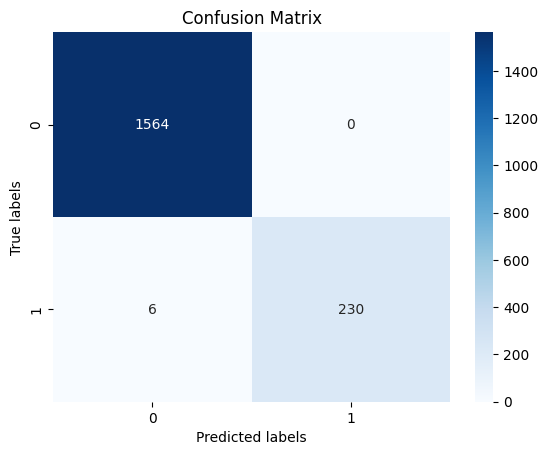

In [14]:
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', cmap = 'Blues', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

##Prueba

In [15]:
data2 = pd.read_csv('/content/datos_prueba.csv')
data2.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,1/1/2023 0:00,596,3156,533.07,31,0,0,0
1,1,1,1/1/2023 0:02,4961,3412,808.56,130,0,0,0
2,2,2,1/1/2023 0:07,2,1365,1442.94,476,0,1,1
3,3,3,1/1/2023 0:09,4128,8737,620.65,569,0,0,0
4,896210,896210,4/4/2023 11:05,2504,8847,777.20,8075118,93,0,0


In [16]:
data2.columns

Index(['Unnamed: 0', 'TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID',
       'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS',
       'TX_FRAUD', 'TX_FRAUD_SCENARIO'],
      dtype='object')

In [17]:
data2_sel = data2.drop(columns=['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID'])
data2.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,1/1/2023 0:00,596,3156,533.07,31,0,0,0
1,1,1,1/1/2023 0:02,4961,3412,808.56,130,0,0,0
2,2,2,1/1/2023 0:07,2,1365,1442.94,476,0,1,1
3,3,3,1/1/2023 0:09,4128,8737,620.65,569,0,0,0
4,896210,896210,4/4/2023 11:05,2504,8847,777.20,8075118,93,0,0


In [18]:
data2_sel.columns

Index(['Unnamed: 0', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS',
       'TX_FRAUD', 'TX_FRAUD_SCENARIO'],
      dtype='object')

In [22]:
# Hacer predicciones con el modelo entrenado
data2_sel = data2[['TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS']]
pred_new = model_rf.predict(data2_sel)
pred_new2 = model_log.predict(data2_sel)

y_test_new = data2['TX_FRAUD']
# Evaluar las predicciones del modelo
acc_new = accuracy_score(y_test_new, pred_new)
precision_new = precision_score(y_test_new, pred_new)
recall_new = recall_score(y_test_new, pred_new)
f1_new = f1_score(y_test_new, pred_new)
confusion_new = confusion_matrix(y_test_new, pred_new)

# Imprimir métricas de evaluación
print('----------- Random Forest')
print(pred_new)
print('Accuracy Score (New Data):', int(acc_new * 100), '%')
print('Precision (New Data):', precision_new)
print('Recall (New Data):', recall_new)
print('F1 Score (New Data):', f1_new)
print('Confusion Matrix (New Data):\n', confusion_new)

# Evaluar las predicciones del modelo
acc_new2 = accuracy_score(y_test_new, pred_new2)
precision_new2 = precision_score(y_test_new, pred_new2)
recall_new2 = recall_score(y_test_new, pred_new2)
f1_new2 = f1_score(y_test_new, pred_new2)
confusion_new2 = confusion_matrix(y_test_new, pred_new2)

# Imprimir métricas de evaluación
print('----------- Regresión Logística')
print(pred_new2)
print('Accuracy Score (New Data):', int(acc_new2 * 100), '%')
print('Precision (New Data):', precision_new2)
print('Recall (New Data):', recall_new2)
print('F1 Score (New Data):', f1_new2)
print('Confusion Matrix (New Data):\n', confusion_new2)

----------- Random Forest
[0 0 1 0 0 0 0 0 1 1 1]
Accuracy Score (New Data): 100 %
Precision (New Data): 1.0
Recall (New Data): 1.0
F1 Score (New Data): 1.0
Confusion Matrix (New Data):
 [[7 0]
 [0 4]]
----------- Regresión Logística
[0 1 1 0 0 0 0 0 1 1 1]
Accuracy Score (New Data): 90 %
Precision (New Data): 0.8
Recall (New Data): 1.0
F1 Score (New Data): 0.8888888888888888
Confusion Matrix (New Data):
 [[6 1]
 [0 4]]
